In [1]:
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
import math as m
import numpy as np
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
sns.set()

In [2]:
def growth_rate_to_doubling_time(growth_rates):
    return np.sign(growth_rates) * (np.log(2) / (np.sign(growth_rates) * growth_rates))

def doubling_time_to_growth_rate(doubling_times):
    return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))

In [3]:
data = pd.read_excel("../../Data/Simulation Results/UK Model/backwards tracing pars frozen recall.xlsx", index_col = 0)
days_simulated = 25

In [4]:
data

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,prob_has_trace_app,test_before_propagate_tracing,test_delay_mean,probable_infections_need_test,number_of_days_to_trace_backwards,...,15,16,17,18,19,20,21,22,23,24
0,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,6,...,1305,1533,1790,2085,2428,2837,3254,3774,4374,5054
1,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,7,...,1282,1511,1739,2030,2375,2762,3176,3654,4260,4913
2,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,6,...,1235,1439,1674,1962,2292,2634,3060,3565,4106,4783
3,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,11,...,1042,1231,1443,1680,1938,2235,2593,3009,3471,4015
4,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,4,...,1150,1339,1553,1783,2072,2411,2822,3232,3735,4360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,3,...,1316,1539,1817,2137,2502,2929,3474,4021,4689,5486
996,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,2,...,1235,1468,1704,1998,2334,2716,3134,3656,4280,4963
997,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,5,...,1452,1709,1997,2328,2736,3193,3757,4348,5080,5875
998,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,8,...,1353,1563,1843,2142,2513,2883,3328,3887,4474,5211


In [5]:
infection_counts = [str(i) for i in range(days_simulated)]
infection_counts = data[infection_counts]

Text(0.5, 1.0, 'Total Infected')

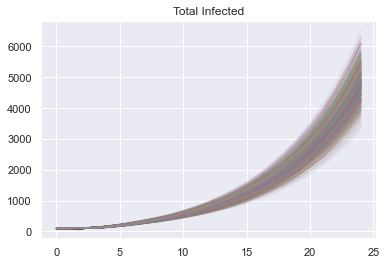

In [6]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected")

Text(0.5, 1.0, '$log_2$(Total Infected)')

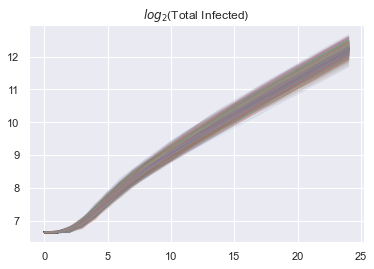

In [7]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_].apply(lambda x: np.log2(x)), alpha = 0.1)
plt.title("$log_2$(Total Infected)")

Text(0.5, 1.0, 'Infection Incidence')

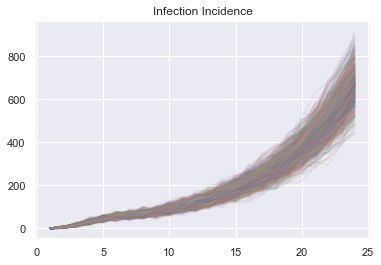

In [8]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1), alpha = 0.1)
plt.title("Infection Incidence")

Text(0.5, 1.0, 'Infection Incidence (10 epidemics)')

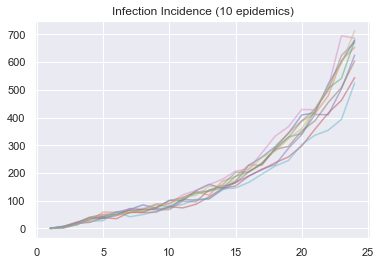

In [9]:
for _ in range(10):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1), alpha = 0.5)
plt.title("Infection Incidence (10 epidemics)")

Text(0.5, 1.0, '$Log_e$(Case Incidence) (14 epidemics)')

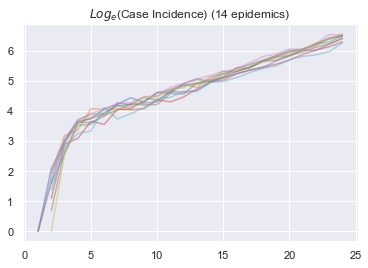

In [10]:
for _ in range(10):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1).apply(lambda x: np.log(x)), alpha = 0.5)
plt.title("$Log_e$(Case Incidence) (14 epidemics)")
#plt.savefig("Figures/Log_case_incidence.png")

We can see the variance begins to increase for the exponentially decaying epidemcis as they near 0. In order to get good estimation for the epidemics, we icnrease the starting number of infections. In this experiment, we start with 5000 infected, let the process run for 10 days, and then estimated the growth rate using days 10-30.

In [11]:
log_diff = infection_counts.iloc[_].diff(1).apply(lambda x: np.log(x))

data_set_up = {
    "log_case_incidence": log_diff[10:days_simulated],
    "time": list(range(10, days_simulated))
}
dataframe = pd.DataFrame(data_set_up)

C:\Users\mfyles\OneDrive - The Alan Turing Institute\Documents\household-contact-tracing\tracing\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:     log_case_incidence   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1499.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           8.15e-15
Time:                        19:56:13   Log-Likelihood:                 22.954
No. Observations:                  15   AIC:                            -41.91
Df Residuals:                      13   BIC:                            -40.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0568      0.059     51.829      0.0

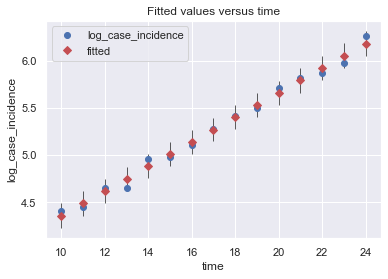

In [12]:
y, X = dmatrices('log_case_incidence ~ time', 
                 data = dataframe)
model = sma.OLS(y, X)
res = model.fit()
print(res.summary())
fig = sm.graphics.regressionplots.plot_fit(res, 1)
print(f"doublign time = {m.log(2)/res.params[1]}")

In [13]:
data_subset = infection_counts

In [14]:
growth_rates = []
for _ in range(data_subset.shape[0]):
    print(f"current fit; {_}", end = "\r")
    
    log_diff = data_subset.iloc[_].diff(1).apply(lambda x: np.log(x))

    data_set_up = {
        "log_case_incidence": log_diff[10:25],
        "time": list(range(10, 25))
    }
    dataframe = pd.DataFrame(data_set_up)
    dataframe = pd.DataFrame(data_set_up)
    
    y, X = dmatrices('log_case_incidence ~ time', 
                     data = dataframe)
    model = sma.RLM(y, X)
    res = model.fit()
    growth_rates.append(res.params[1])

    if res.params[1] == -float("inf"):
        print(f"missing data in line {_}")

In [15]:
x = pd.Series(growth_rates) # 200 values
#x = x[x.between(x.quantile(.05), x.quantile(.95))] # without outliers

Text(0.5, 1.0, 'Distribution of Growth Rates')

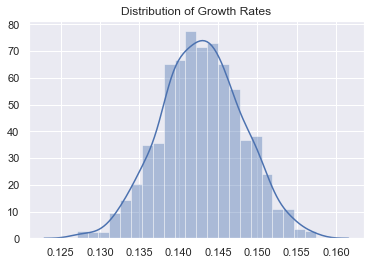

In [16]:
sns.distplot(x)
plt.title("Distribution of Growth Rates")

In [17]:
data_pars = data[data.columns[0:11]]
growth_rate_series = pd.Series(growth_rates)
data_pars["growth_rate"] = growth_rate_series

<ipython-input-17-fbedfbebcb19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pars["growth_rate"] = growth_rate_series


In [18]:
data_pars

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,prob_has_trace_app,test_before_propagate_tracing,test_delay_mean,probable_infections_need_test,number_of_days_to_trace_backwards,backwards_tracing_time_limit,growth_rate
0,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,6,20,0.140349
1,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,7,16,0.139118
2,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,6,7,0.144104
3,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,11,21,0.141439
4,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,4,32,0.147447
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,3,17,0.157341
996,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,2,20,0.149522
997,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,5,24,0.143883
998,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,8,16,0.141571


In [19]:
y, X = dmatrices('growth_rate ~  number_of_days_to_trace_backwards + I(number_of_days_to_trace_backwards**2)', 
                 data = data_pars)
model_2 = sma.OLS(y, X)
res = model_2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            growth_rate   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     20.70
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           1.56e-09
Time:                        19:56:24   Log-Likelihood:                 3864.7
No. Observations:                1000   AIC:                            -7723.
Df Residuals:                     997   BIC:                            -7709.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

<ipython-input-2-e3933c76672f>:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))
<ipython-input-2-e3933c76672f>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))


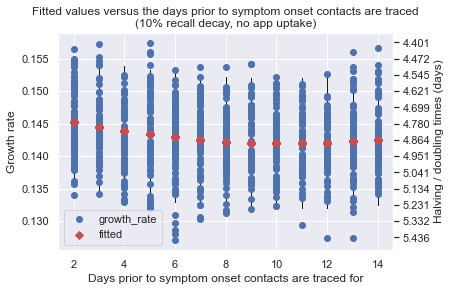

In [20]:
fig, ax = plt.subplots()

sm.graphics.regressionplots.plot_fit(res, "number_of_days_to_trace_backwards", ax = ax)

y_vals = np.linspace(0.125, 0.160, 15)
# omit the 0
#y_vals = np.concatenate((y_vals[:7], y_vals[8:]))

ax2 = ax.secondary_yaxis("right", functions=(growth_rate_to_doubling_time, doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(y_vals), minor = False)

plt.title("Fitted values versus the days prior to symptom onset contacts are traced\n(10% recall decay, no app uptake)")
plt.xlabel("Days prior to symptom onset contacts are traced for")
plt.ylabel("Growth rate")
ax2.set_ylabel("Halving / doubling times (days)")
plt.savefig("../../Figures/UK Model/days_prior_to_symptom_onset_recall.svg", bbox_inches='tight')
plt.savefig("../../Figures/UK Model/days_prior_to_symptom_onset_recall.png", bbox_inches='tight')

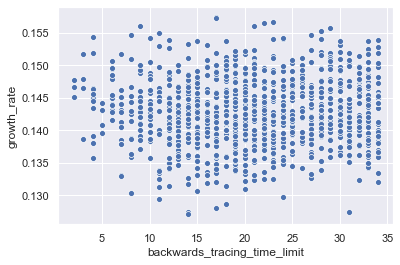

In [21]:
sns.scatterplot(data_pars["backwards_tracing_time_limit"], data_pars["growth_rate"])

## Residuals vs Fitted Value

There doesn't appear to be any systematic deviation from our predicted value

Text(0, 0.5, 'Residual')

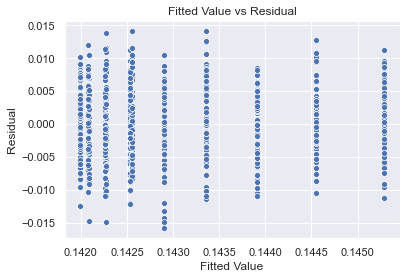

In [22]:
sns.scatterplot(res.fittedvalues, res.resid)
plt.title("Fitted Value vs Residual")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")

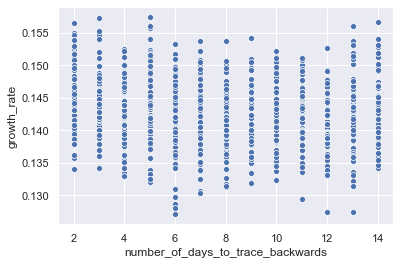

In [23]:
sns.scatterplot(data_pars["number_of_days_to_trace_backwards"], data_pars["growth_rate"])

## Residual Distribution

Text(0.5, 1.0, 'Distribution of the residuals')

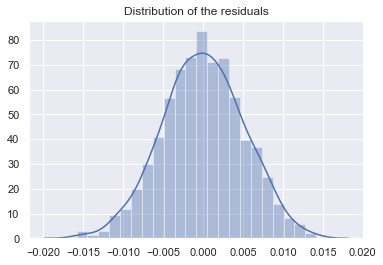

In [24]:
sns.distplot(res.resid)
plt.title("Distribution of the residuals")